In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import copy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)

In [2]:
df = pd.read_csv('preprocessed.csv', low_memory=False)
df['Date'] = df['Date'].astype('datetime64[ns]')
df['SalaryRange'] = (df['HighestSalary']-df['LowestSalary'])
df['AverageSalary'] = (df['HighestSalary']+df['LowestSalary'])/2

In [3]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,FullDescriptionTokens,RequirementTokens,TitleTokens,SalaryRange,AverageSalary
0,37515643,Forklift Drivers WANTED! ***FULL TIME OPPORTUN...,Australian Personnel Solutions,2018-10-19,Melbourne,Western Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution",Our client is looking for an experienced count...,Our client is based in Yarraville&nbsp;and is ...,50,60,Contract/Temp,"['Our', 'client', 'based', 'Yarravillenbspand'...","['Our', 'client', 'looking', 'experienced', 'c...","['Our', 'client', 'looking', 'experienced', 'c...",10,55.0
1,38154814,Delivery Lead/Iteration Manager,DIUS Computing Pty Ltd,2019-01-20,Other,Other,Other,Other,If you love all things Agile and have experien...,DiUS is an Australian technology consultancy. ...,120,150,Full Time,"['DiUS', 'Australian', 'technology', 'consulta...","['If', 'love', 'thing', 'Agile', 'experience',...","['If', 'love', 'thing', 'Agile', 'experience',...",30,135.0
2,37999957,"Local Manager. Permanent, Full time - Lower Hu...",Life Without Barriers,2019-01-02,Other,Other,Other,Other,Join our Lower Hunter team as a Local Manager ...,About the&nbsp;Organisation Life Without Barri...,100,120,Full Time,"['About', 'thenbspOrganisation', 'Life', 'With...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...","['Join', 'Lower', 'Hunter', 'team', 'Local', '...",20,110.0
3,37936799,Clinical Nurse Educator - Youth Justice,Correct Care Australasia,2018-12-14,Melbourne,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",This is an exciting opportunity for a Clinical...,Correct Care Australasia (Correct Care)...,0,30,Part Time,"['Correct', 'Care', 'Australasia', 'Correct', ...","['This', 'exciting', 'opportunity', 'Clinical'...","['This', 'exciting', 'opportunity', 'Clinical'...",30,15.0
4,37680645,Graduate Project Engineer,Other,2018-11-09,Melbourne,Western Suburbs,Engineering,Project Engineering,Elastomers Australia are currently seeking a G...,The Company Elastomers Australia is an industr...,50,60,Full Time,"['The', 'Company', 'Elastomers', 'Australia', ...","['Elastomers', 'Australia', 'currently', 'seek...","['Elastomers', 'Australia', 'currently', 'seek...",10,55.0
5,38063057,Receptionist,Gough Property & Real Estate Recruiters,2019-01-09,Other,Other,Other,Other,** Entry Level Real Estate Reception roles SYD...,Do you want a break into real estate?&nbsp; ...,40,50,Full Time,"['Do', 'want', 'break', 'real', 'estatenbsp', ...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...","['Entry', 'Level', 'Real', 'Estate', 'Receptio...",10,45.0
6,38079997,Principal Engineer Operations Planning,Powerlink,2019-01-10,Other,Other,Other,Other,Critical expert role to keep Queensland's HV t...,"Powerlink, and its predecessor companies have ...",150,200,Contract/Temp,"['Powerlink', 'predecessor', 'company', 'helpi...","['Critical', 'expert', 'role', 'keep', 'Queens...","['Critical', 'expert', 'role', 'keep', 'Queens...",50,175.0
7,38068325,Forklift Operator with Admin Experience,Toll,2019-01-10,Other,Other,Other,Other,Immediate start / Morning shift available / Ex...,About the company Toll People in conju...,30,40,Full Time,"['About', 'company', 'Toll', 'People', 'conjun...","['Immediate', 'start', 'Morning', 'shift', 'av...","['Immediate', 'start', 'Morning', 'shift', 'av...",10,35.0
8,37409088,Retail Goods Receiving / Warehouse - Springwood,Total Tools - Store Network,2018-10-08,Brisbane,Southern Suburbs & Logan,Retail & Consumer Products,Other,Utilise your goods receiving experience and wa...,About the Role Total Tools Springwood is...,40,50,Full Time,"['About', 'Role', 'Total', 'Tools', 'Springwoo...","['Utilise', 'good', 'receiving', 'experience',...","['Utilise', 'good', 'receiving', 'experience',...",10,45.0
9,37449308,Commercial Manager - Oil & Gas - PNG based,Amida,2018-10-12,Brisbane,Other,"Mining, Re

In [47]:
dfl = df.groupby(['Date'])['Location'].value_counts()

In [77]:
dfl.index[0]

(Timestamp('2018-10-01 00:00:00'), 'Sydney')

In [51]:
#dfl = dfl.loc[['Other','Sydney','Melbourne','Brisbane','Perth','Adelaide','ACT']]

In [87]:
dates = df['Date'].value_counts()
dates = dates.sort_index()
str(dates.index[0])[:10]

'2018-10-01'

In [69]:
locations = ['Other','Sydney','Melbourne','Brisbane','Perth','Adelaide','ACT']

In [97]:
dateloc = pd.DataFrame(index=dates.index,columns=locations)
dateloc.head()

,Other,Sydney,Melbourne,Brisbane,Perth,Adelaide,ACT
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
for x in dates.index:
    for y in locations:
        try:
            print(x,y,dfl[x,y])
            dateloc.at[x,y] = dfl[x,y]
        except:
            print(x,y,0)
            dateloc.at[x,y] = 0

2018-10-01 00:00:00 Other 0
2018-10-01 00:00:00 Sydney 12
2018-10-01 00:00:00 Melbourne 9
2018-10-01 00:00:00 Brisbane 1
2018-10-01 00:00:00 Perth 1
2018-10-01 00:00:00 Adelaide 0
2018-10-01 00:00:00 ACT 3
2018-10-02 00:00:00 Other 0
2018-10-02 00:00:00 Sydney 37
2018-10-02 00:00:00 Melbourne 14
2018-10-02 00:00:00 Brisbane 4
2018-10-02 00:00:00 Perth 5
2018-10-02 00:00:00 Adelaide 1
2018-10-02 00:00:00 ACT 2
2018-10-03 00:00:00 Other 0
2018-10-03 00:00:00 Sydney 49
2018-10-03 00:00:00 Melbourne 37
2018-10-03 00:00:00 Brisbane 18
2018-10-03 00:00:00 Perth 5
2018-10-03 00:00:00 Adelaide 7
2018-10-03 00:00:00 ACT 2
2018-10-04 00:00:00 Other 0
2018-10-04 00:00:00 Sydney 81
2018-10-04 00:00:00 Melbourne 69
2018-10-04 00:00:00 Brisbane 27
2018-10-04 00:00:00 Perth 20
2018-10-04 00:00:00 Adelaide 6
2018-10-04 00:00:00 ACT 6
2018-10-05 00:00:00 Other 0
2018-10-05 00:00:00 Sydney 59
2018-10-05 00:00:00 Melbourne 57
2018-10-05 00:00:00 Brisbane 17
2018-10-05 00:00:00 Perth 11
2018-10-05 00:00:0

In [79]:
#dfl['2018-10-01','Other']

In [100]:
dateloc.head()

,Other,Sydney,Melbourne,Brisbane,Perth,Adelaide,ACT
2018-10-01,0,12,9,1,1,0,3
2018-10-02,0,37,14,4,5,1,2
2018-10-03,0,49,37,18,5,7,2
2018-10-04,0,81,69,27,20,6,6
2018-10-05,0,59,57,17,11,9,6


In [101]:
dateloc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141 entries, 2018-10-01 to 2019-03-13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Other      141 non-null    object
 1   Sydney     141 non-null    object
 2   Melbourne  141 non-null    object
 3   Brisbane   141 non-null    object
 4   Perth      141 non-null    object
 5   Adelaide   141 non-null    object
 6   ACT        141 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


<AxesSubplot:title={'center':'Job post frequency by date/location'}, xlabel='Date', ylabel='Job count'>

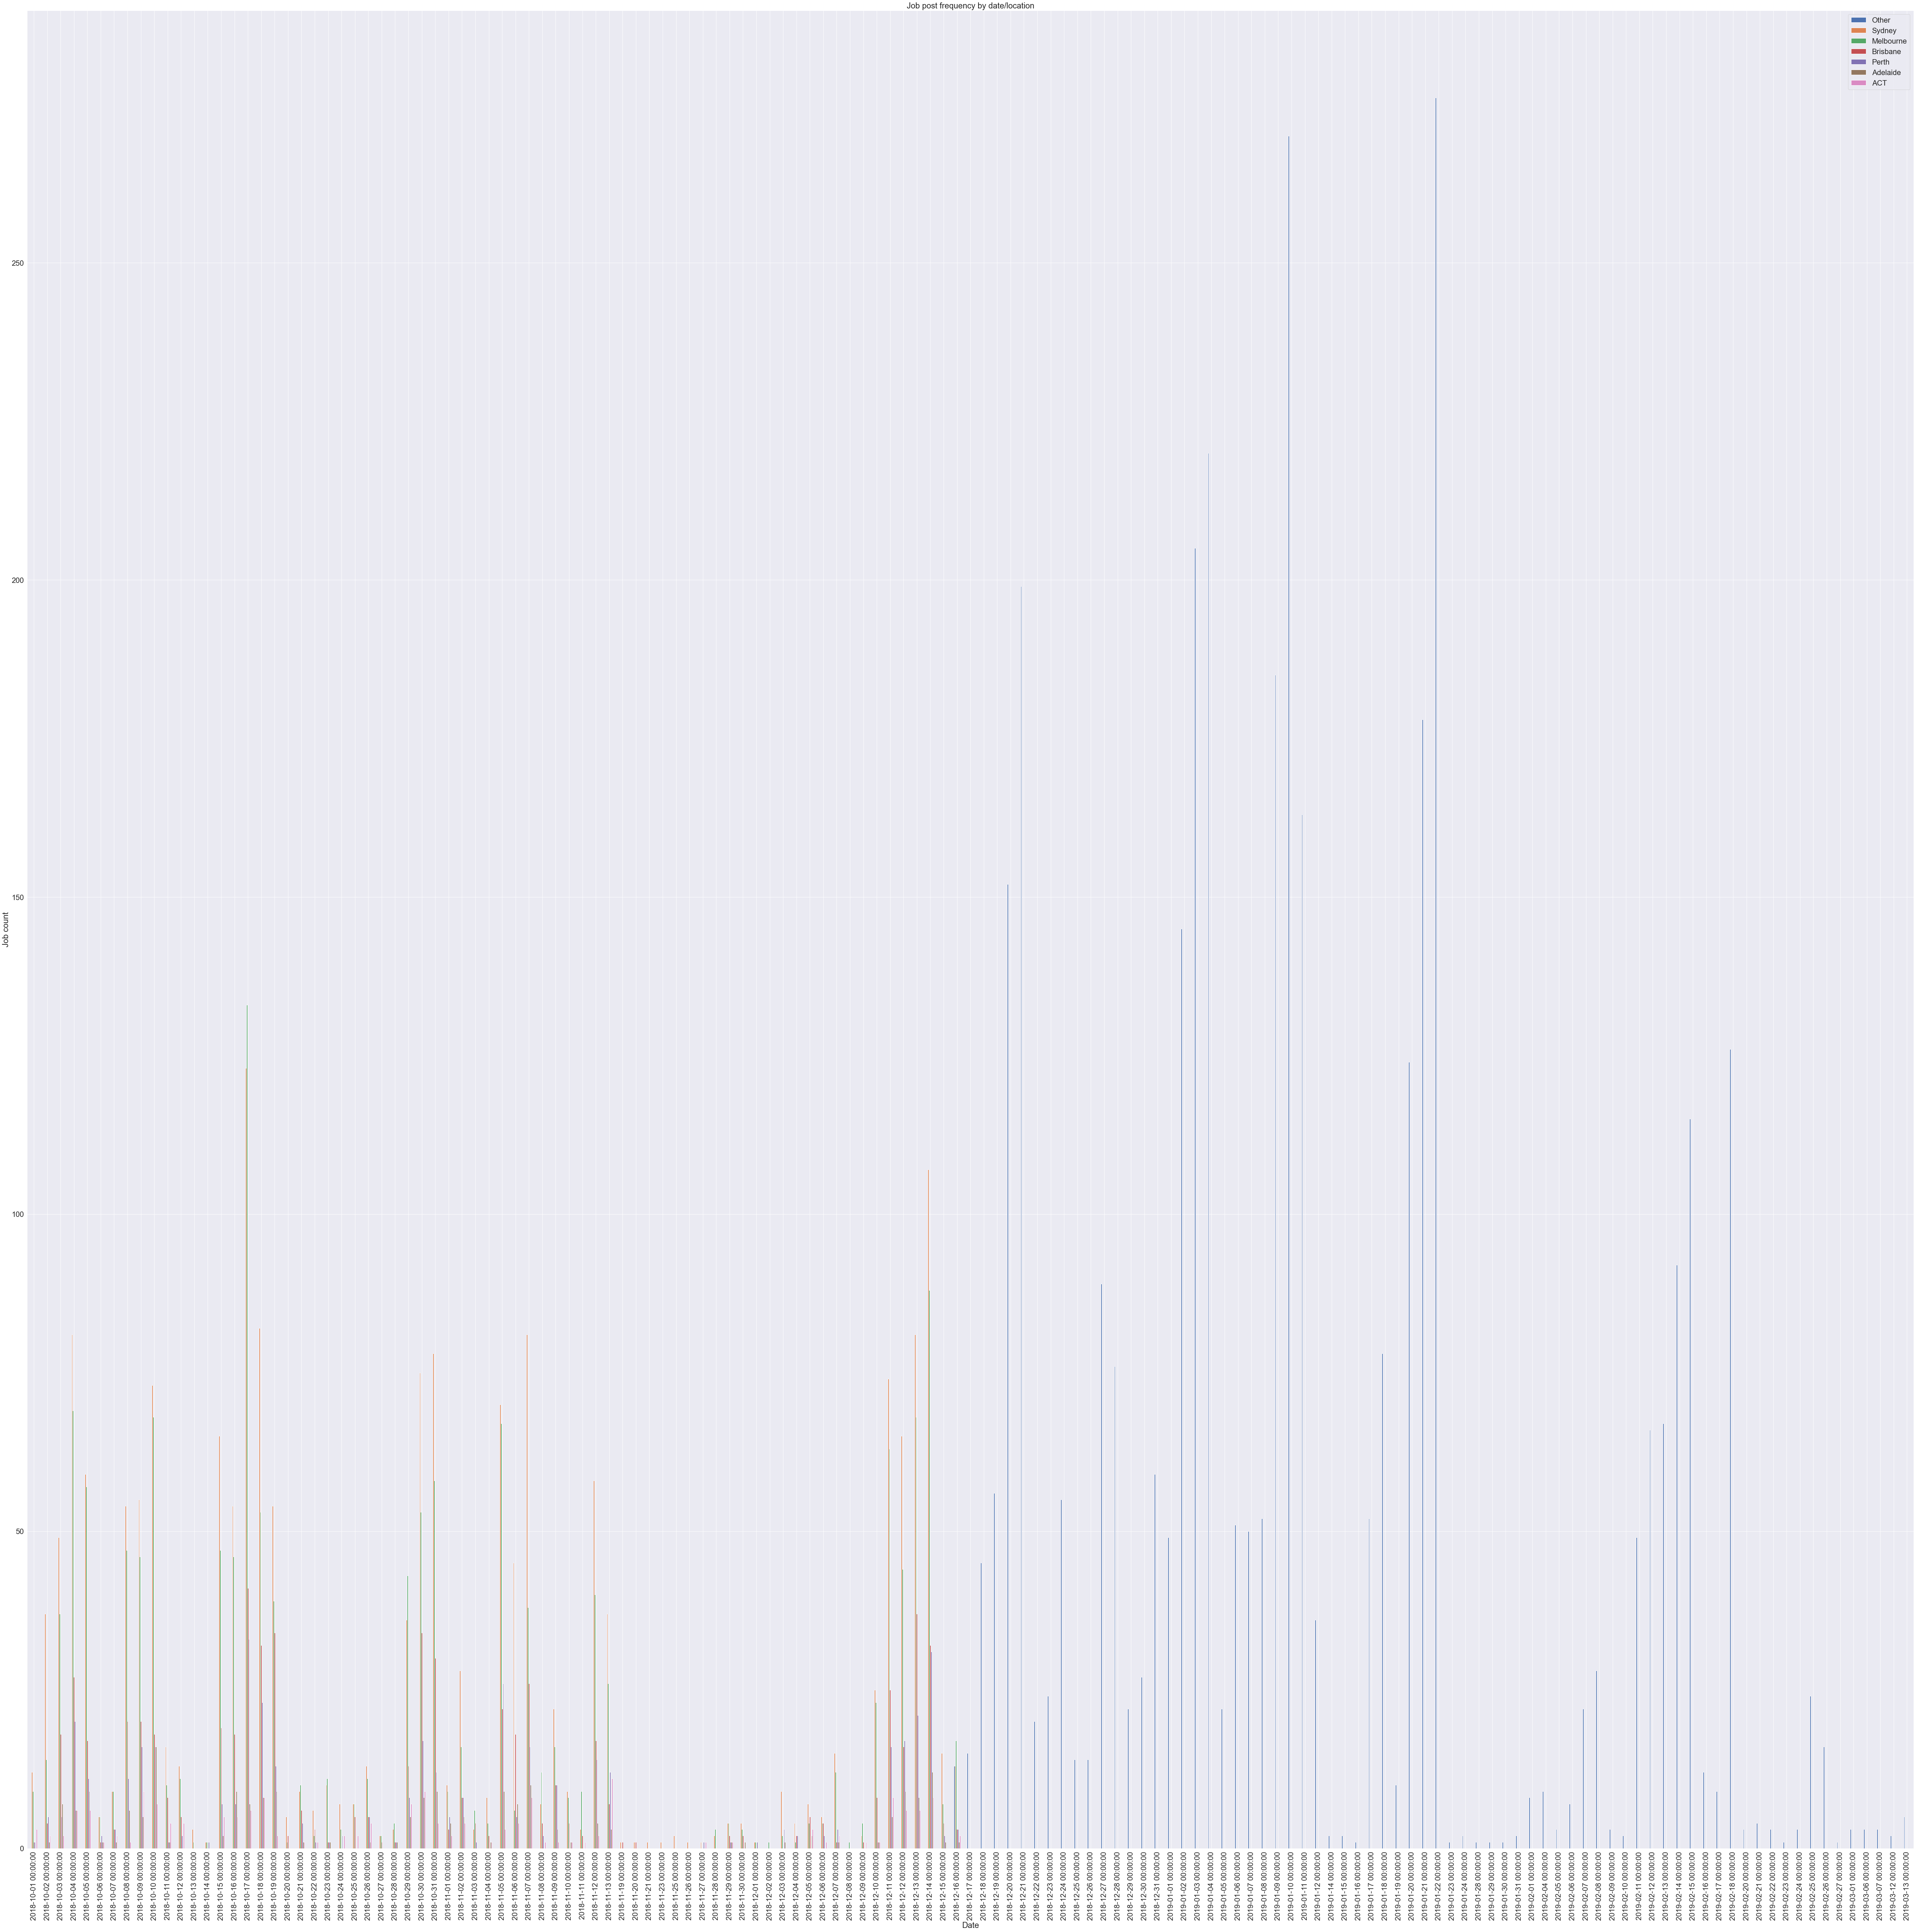

In [113]:
dateloc.plot(kind="bar",figsize=(100,100),title = 'Job post frequency by date/location', xlabel='Date', ylabel='Job count')

<AxesSubplot:title={'center':'Job post frequency by date/location'}, xlabel='Date', ylabel='Job count'>

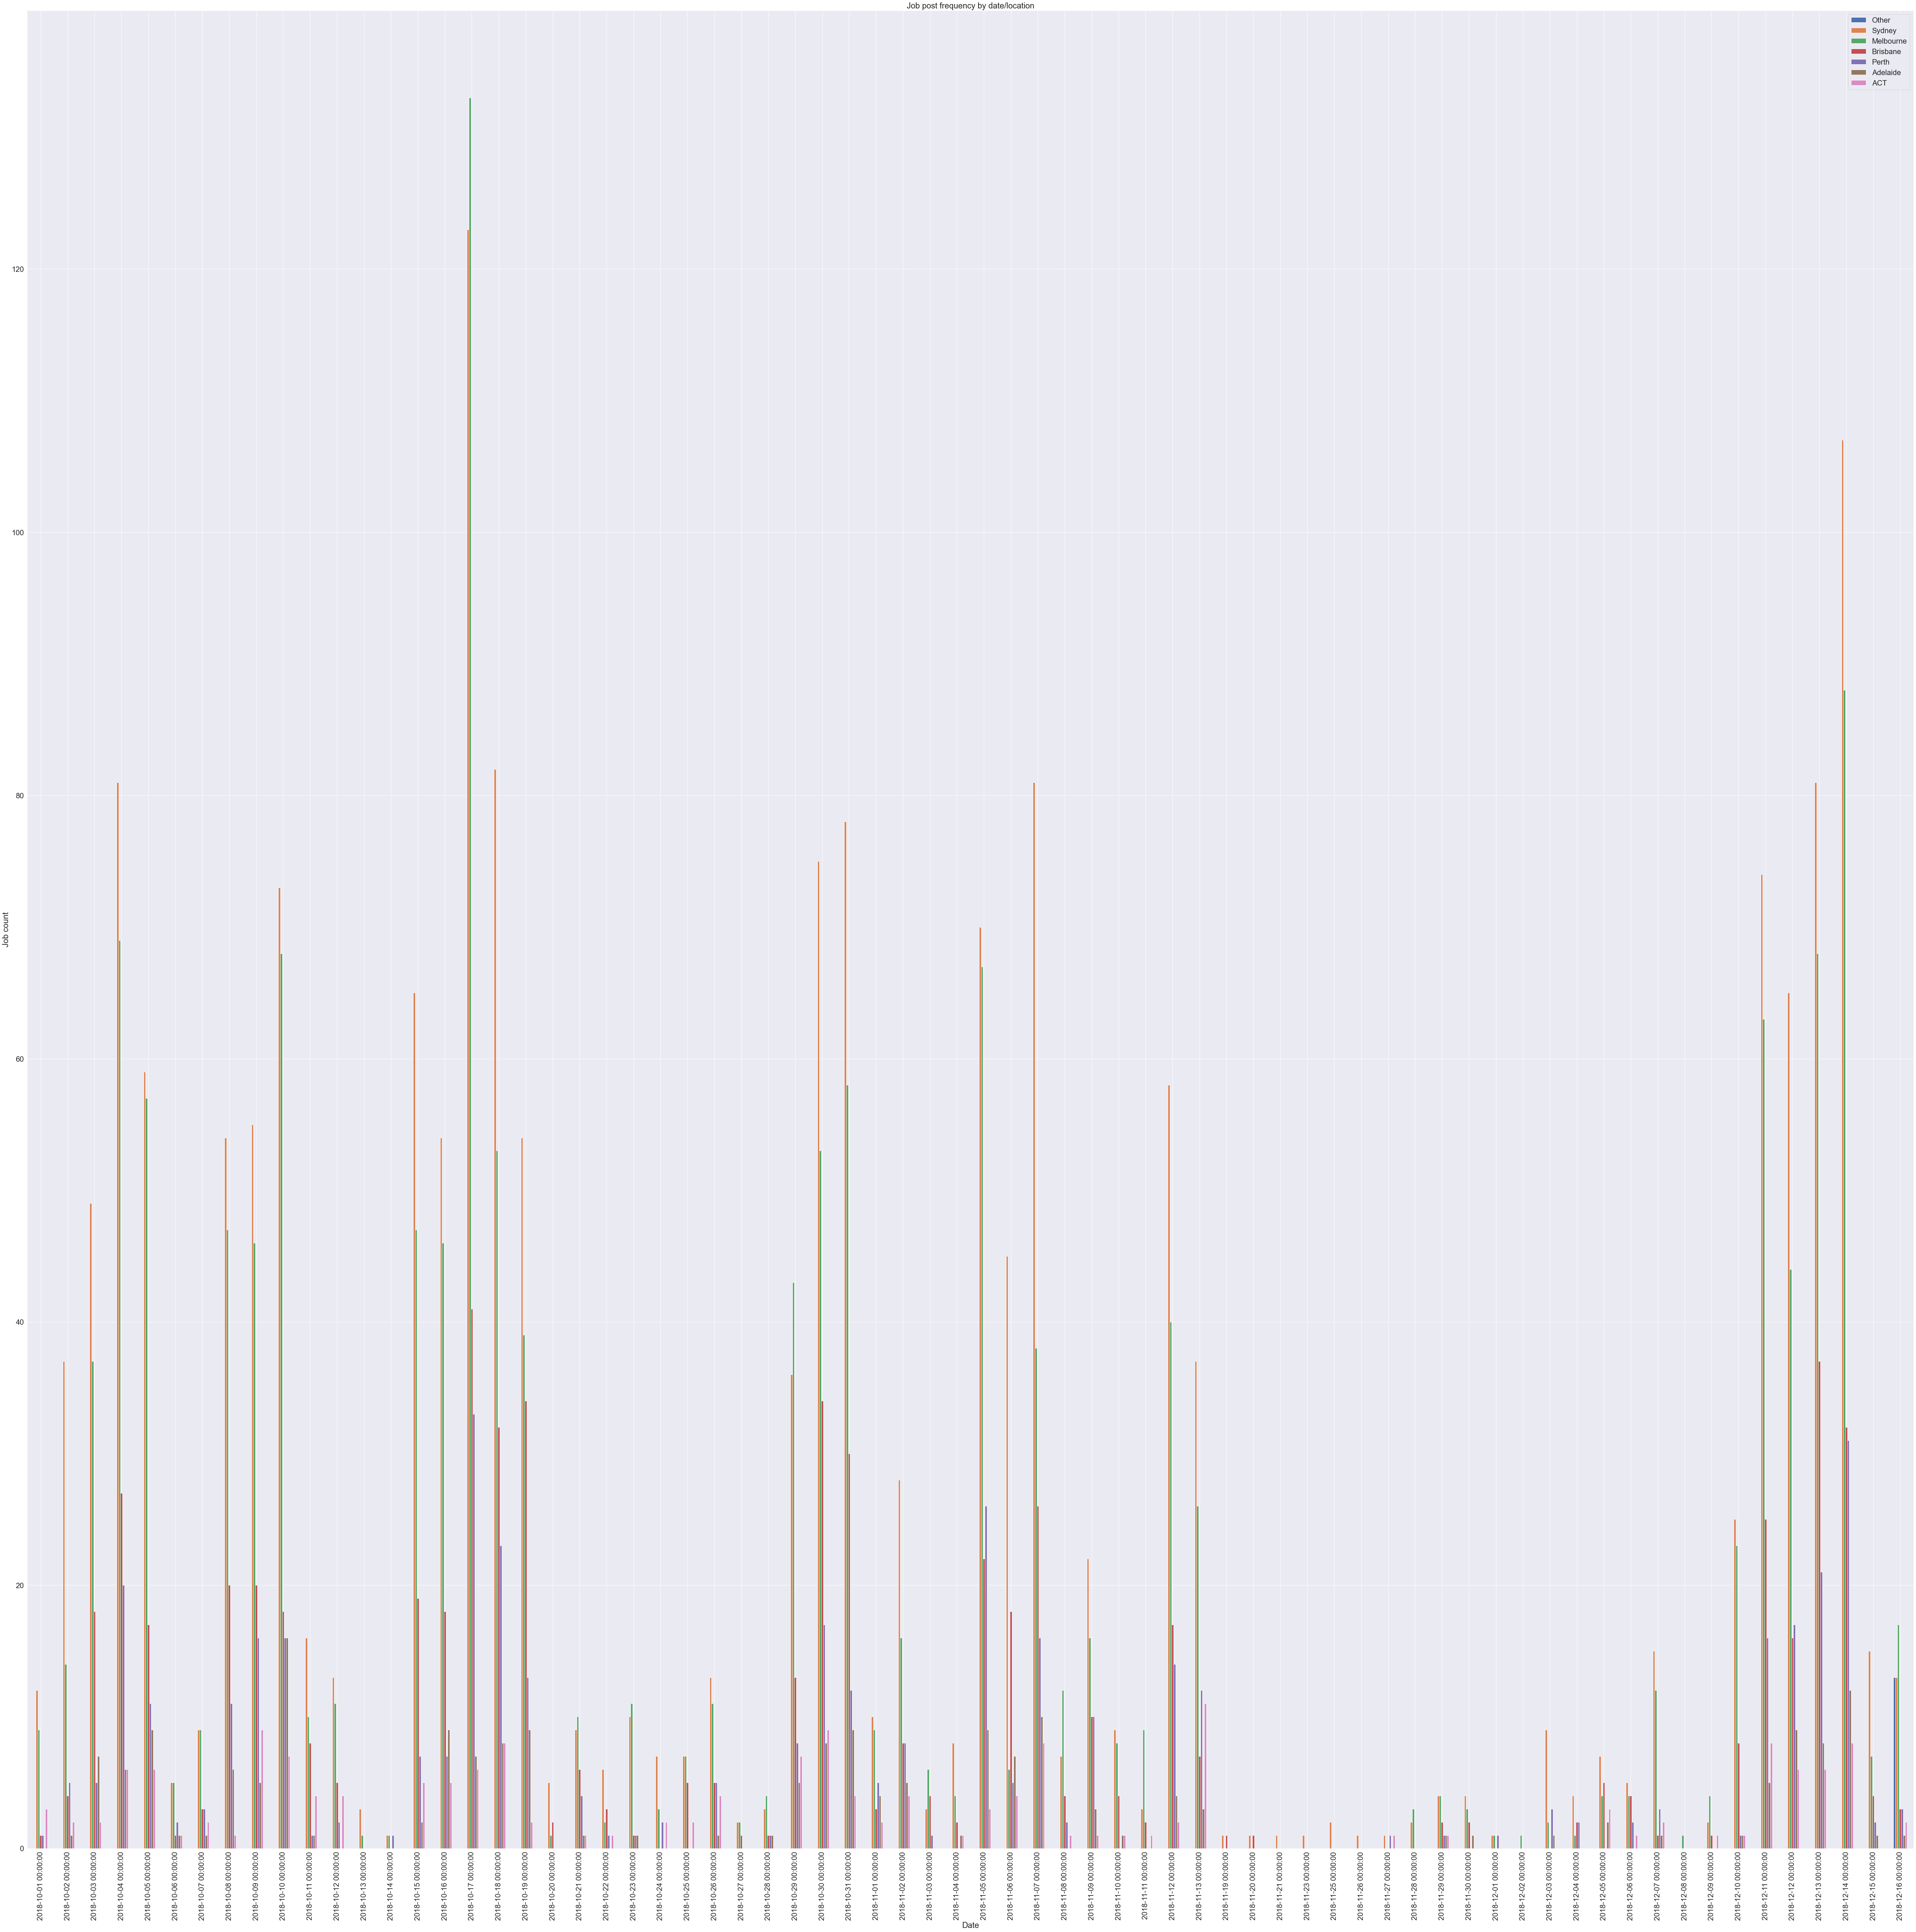

In [114]:
dateloc.loc[:'2018-12-16'].plot(kind="bar",figsize=(100,100),title = 'Job post frequency by date/location', xlabel='Date', ylabel='Job count')